In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
crime_csv = "crime.csv"

In [40]:
crime_df = pd.read_csv(crime_csv)
crime_df.head(250)

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0
5,201872837,201872837549900,5499,0,traf-other,all-other-crimes,1/31/2018 12:44:00 AM,NaN,1/31/2018 1:29:00 AM,2100 BLOCK E 17TH AVE,3151310.0,1696020.0,-104.961928,39.743149,6,622,city-park-west,1,0
6,20186001015,20186001015230400,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,6/1/2017 12:15:00 PM,1/26/2018 12:15:00 PM,1/26/2018 12:24:00 PM,995 N FEDERAL BLVD,3133441.0,1692147.0,-105.025543,39.732790,1,122,villa-park,1,0
7,201870628,201870628570700,5707,0,criminal-trespassing,all-other-crimes,1/30/2018 7:40:00 AM,NaN,1/30/2018 10:33:00 AM,E SPEER BLVD / N GRANT ST,3145202.0,1688799.0,-104.983794,39.723424,3,311,speer,1,0
8,201870833,201870833540100,5401,0,traffic-accident-hit-and-run,traffic-accident,1/30/2018 9:10:00 AM,NaN,1/30/2018 9:17:00 AM,W 13TH AVE / N CHEROKEE ST,3142965.0,1693682.0,-104.991650,39.736863,6,611,civic-center,0,1
9,20186001048,20186001048230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,1/31/2018 12:55:00 AM,1/31/2018 6:55:00 AM,1/31/2018 7:07:00 AM,2828 N ZUNI ST,3136231.0,1701209.0,-105.015451,39.757627,1,113,highland,1,0


In [39]:
#What is the most common category (overall)
category_type_count = crime_df.groupby(["OFFENSE_CATEGORY_ID"]).agg({"OFFENSE_ID":"count"}).reset_index()
# category_type_count.sort_values(by = ['OFFENSE_ID'], axis=0, ascending=False, inplace=False)
category_type_count

,OFFENSE_CATEGORY_ID,OFFENSE_ID
0,aggravated-assault,10540
1,all-other-crimes,82995
2,arson,575
3,auto-theft,23798
4,burglary,22648
5,drug-alcohol,30275
6,larceny,45553
7,murder,259
8,other-crimes-against-persons,22085
9,public-disorder,47719


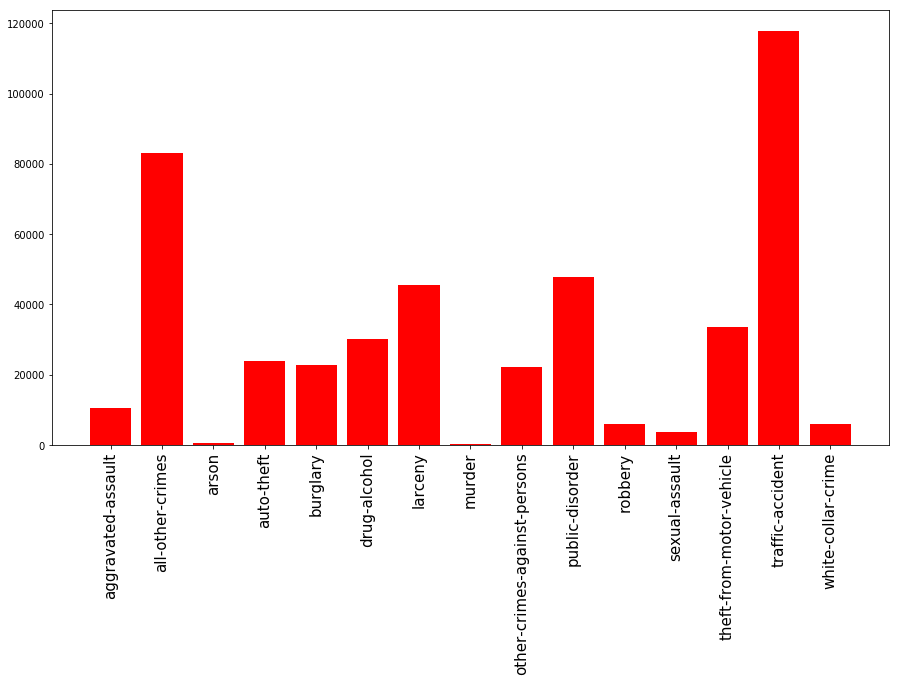

In [32]:
plt.figure(figsize=(15,8))
plt.bar(category_type_count["OFFENSE_CATEGORY_ID"],category_type_count["OFFENSE_ID"],color = "r")
plt.xticks(rotation=90,fontsize=15
          )
plt.show()

In [74]:
def group_category(current_cat): 
    try:
        if current_cat in ['auto-theft', 'burglary', 'robbery', 'theft-from-motor-vehicle', 'larceny']:
            return "Theft_Burg"
        elif current_cat in ['public-disorder', 'all-other-crimes', 'white-collar-crime', 'other-crimes-against-persons']:
            return "Other"
        elif current_cat in ['drug-alcohol']:
            return "Drug"
        elif current_cat in ['murder', 'aggravated-assault', 'sexual-assault', 'arson']:
            return "Violent"
        elif current_cat in ['traffic-accident']:
            return "Traffic"
        else: return "other_unhandled_case"
    except: return "check_later"

crime_df['high_level_crime_cat'] = crime_df.OFFENSE_CATEGORY_ID.map(group_category)
crime_df.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,high_level_crime_cat
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0,Other
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0,Theft_Burg
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0,Theft_Burg
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0,Theft_Burg
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0,Theft_Burg


,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,high_level_crime_cat
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0,Other
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0,Theft_Burg
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0,Theft_Burg
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0,Theft_Burg
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0,Theft_Burg


In [14]:
neighborhood_name = crime_df.groupby(["NEIGHBORHOOD_ID","high_level_crime_cat"]).agg({"INCIDENT_ID":"count"}).reset_index()
limit_neighborhood = list(neighborhood_name.NEIGHBORHOOD_ID.value_counts().to_dict())[:6]
limited = neighborhood_name[neighborhood_name.NEIGHBORHOOD_ID.isin(limit_neighborhood)]
neighborhood_name.head()

,NEIGHBORHOOD_ID,high_level_crime_cat,INCIDENT_ID
0,athmar-park,Drug,469
1,athmar-park,Other,2918
2,athmar-park,Theft_Burg,1686
3,athmar-park,Traffic,1319
4,athmar-park,Violent,240


Text(0.5,1,'Top 6 Neighborhoods Crime Information')

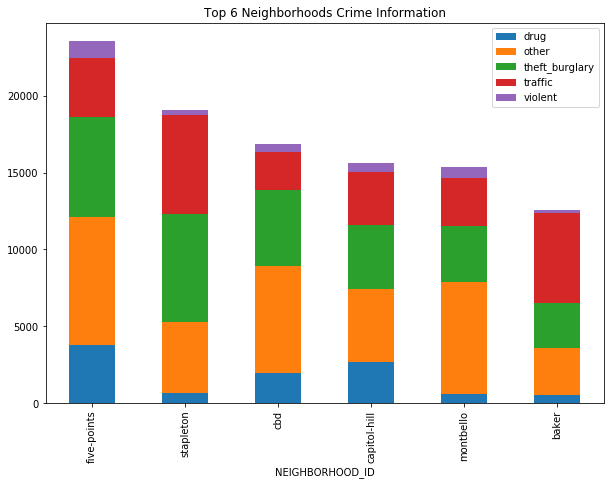

In [20]:
neighborhood_name = crime_df.groupby(["NEIGHBORHOOD_ID","high_level_crime_cat"]).agg({"OFFENSE_ID":"count"}).unstack("high_level_crime_cat").reset_index()
# group by and get a data frame
neighborhood_name["total_crime_number"] = neighborhood_name.sum(axis =1)
neighborhood_desc = neighborhood_name.sort_values('total_crime_number', ascending=False)
limited_desc_top_six = neighborhood_desc.set_index("NEIGHBORHOOD_ID")[:6] 
# sort the dataframe based on total_crime_number to get the top six neighboorhoods
# Reseting the index to neighborhood id is make the name of x-axis be neighborhood name

limited_desc_top_six.columns=['drug','other','theft_burglary','traffic','violent',"total_crime_number"]
# we had multilayer columns and then rename the columns to get selected inform we need 
limited_desc_top_six = limited_desc_top_six[['drug','other','theft_burglary','traffic','violent']]
# drop the totol_crime_number columns 
limited_desc_top_six.plot.bar(stacked=True, figsize=(10,7))
plt.title("Top 6 Neighborhoods Crime Information")
# draw the stacked chart

Text(0.5,1,'Last 6 Neighborhoods Crime Information')

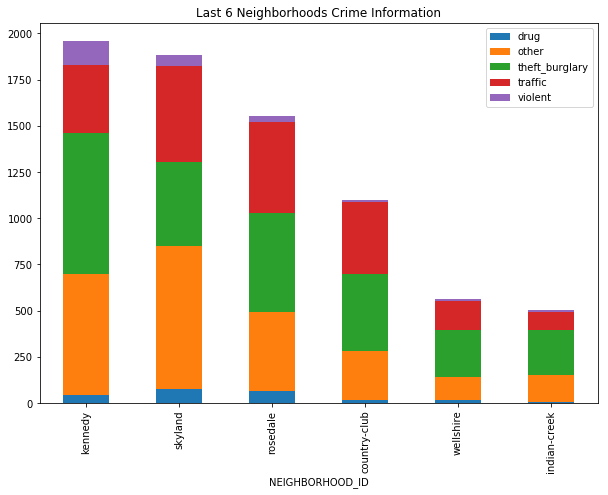

In [21]:
neighborhood_desc = neighborhood_name.sort_values('total_crime_number', ascending=False)
limited_desc_last_six = neighborhood_desc.set_index("NEIGHBORHOOD_ID")[-6:]
limited_desc_last_six.columns=['drug','other','theft_burglary','traffic','violent',"total_crime_number"]
# we had multilayer columns and then rename the columns to get selected inform we need 
limited_desc_last_six = limited_desc_last_six[['drug','other','theft_burglary','traffic','violent']]
# drop the totol_crime_number columns 
limited_desc_last_six.plot.bar(stacked=True, figsize=(10,7))
plt.title("Last 6 Neighborhoods Crime Information")
# draw the stacked chart 

In [76]:
#IS_CRIME & IS_TRAFFIC are not mutually exclusive... some crimes can be both
total_crime = crime_df["OFFENSE_ID"].count()

def traffic_or_criminal(traffic,criminal):
    try:
        if "IS_TRAFFIC" == 1 and "IS_CRIME" == 0:
            return "Traffic"
        elif "IS_TRAFFIC" == 0 and "IS_CRIME" == 1:
            return "Criminal"
        elif "IS_TRAFFIC" == 1 and "IS_CRIME" == 1:
            return "Both"
        else: return "other_unhandled_case"
    except: return "check_later"

crime_df['traffic_vs_criminal'] = crime_df.OFFENSE_CATEGORY_ID.map(traffic_or_criminal) # can I map to 2 columns or what is a different method I could use wiht the function I defined? 
crime_df.head()

TypeError: traffic_or_criminal() missing 1 required positional argument: 'criminal'

In [67]:
# OFFENSE ID
count_offense_id = crime_df["OFFENSE_ID"].count()
unique_offense_id= crime_df["OFFENSE_ID"].nunique()

#INCIDENT ID
count_incident_id = crime_df["INCIDENT_ID"].count()
unique_incident_id= crime_df["INCIDENT_ID"].nunique()


print("Count of OFFENSE_ID: ", count_offense_id)
print("NUnique of OFFENSE_ID: ", unique_offense_id)
print("----------------------------------")
print("Count of INCIDENT_ID: ", count_incident_id)
print("NUnique of INCIDENT_ID: ", unique_incident_id)

# OFFENSE_ID is a unique id where as INCIDENT_ID is not

Count of OFFENSE_ID:  453371
NUnique of OFFENSE_ID:  453371
----------------------------------
Count of INCIDENT_ID:  453371
NUnique of INCIDENT_ID:  418168
